In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Normalizer
from datetime import datetime

In [18]:
columns = ['tweet_id', 'publisher_id', 'tweet_content', 'publisher_name', 'datetime', 'likes', 'retweets', 'hashtags']

df = pd.read_csv('elonmusk_tweets_extended.csv', names=columns)

In [19]:
df.head()

,tweet_id,publisher_id,tweet_content,publisher_name,datetime,likes,retweets,hashtags
0,1344044584712728581,44196397,All Tesla cars delivered in the final three da...,Elon Musk,2020-12-29 22:16:14,73052,3507,[]
1,1344154578678214657,44196397,"Destiny, destinyNo escaping that for me",Elon Musk,2020-12-30 05:33:19,155133,11438,[]
2,1344190775182016512,44196397,@tobyliiiiiiiiii Are we sure this is real?,Elon Musk,2020-12-30 07:57:09,5680,179,[]
3,1344210828052946944,44196397,@harsimranbansal Literally,Elon Musk,2020-12-30 09:16:50,3033,56,[]
4,1344212785228435457,44196397,@Tesmanian_com This is very sensible. Oppositi...,Elon Musk,2020-12-30 09:24:36,4322,165,[]


In [20]:
df = df.drop(['tweet_id', 'publisher_id', 'publisher_name', 'hashtags'], axis=1)

In [21]:
df.head()

,tweet_content,datetime,likes,retweets
0,All Tesla cars delivered in the final three da...,2020-12-29 22:16:14,73052,3507
1,"Destiny, destinyNo escaping that for me",2020-12-30 05:33:19,155133,11438
2,@tobyliiiiiiiiii Are we sure this is real?,2020-12-30 07:57:09,5680,179
3,@harsimranbansal Literally,2020-12-30 09:16:50,3033,56
4,@Tesmanian_com This is very sensible. Oppositi...,2020-12-30 09:24:36,4322,165


In [22]:
dogecoin_data = pd.read_csv('dogecoin.csv')

In [23]:
dogecoin_data.shape

(1827, 7)

In [24]:
dogecoin_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1822,2021-05-03,0.373631,0.445567,0.373631,0.441707,0.441707,1.052665e+10
1823,2021-05-04,0.440274,0.605998,0.400800,0.541334,0.541334,3.823813e+10
1824,2021-05-05,0.537355,0.695262,0.523822,0.657633,0.657633,4.252510e+10
1825,2021-05-06,0.652842,0.663616,0.545102,0.580804,0.580804,1.898990e+10
1826,2021-05-07,0.582930,0.653523,0.520342,0.645051,0.645051,2.076569e+10


### Convert str date to date

In [25]:
df['datetime'] = pd.to_datetime(df.datetime)

In [26]:
dogecoin_data['datetime'] = pd.to_datetime(dogecoin_data.Date)

In [27]:
df.head()

,tweet_content,datetime,likes,retweets
0,All Tesla cars delivered in the final three da...,2020-12-29 22:16:14,73052,3507
1,"Destiny, destinyNo escaping that for me",2020-12-30 05:33:19,155133,11438
2,@tobyliiiiiiiiii Are we sure this is real?,2020-12-30 07:57:09,5680,179
3,@harsimranbansal Literally,2020-12-30 09:16:50,3033,56
4,@Tesmanian_com This is very sensible. Oppositi...,2020-12-30 09:24:36,4322,165


In [28]:
df.describe()

,likes,retweets
count,9.590000e+02,959.000000
mean,7.553052e+04,6231.608968
std,1.412828e+05,15516.214275
min,8.710000e+02,21.000000
25%,4.983500e+03,230.000000
50%,1.254200e+04,618.000000
75%,7.458800e+04,3712.500000
max,1.001120e+06,149329.000000


# EDA

### Transfrom all tweet content into lowercase

In [29]:
df.tweet_content = df.tweet_content.str.lower()

# Search for dogecoin mentions

In [30]:
tweets_about_dogecoin_indeces = df.tweet_content.str.find('doge')
df['isDogecoin'] = 0
df.loc[tweets_about_dogecoin_indeces >= 0, 'isDogecoin'] = 1

In [31]:
df.head()

,tweet_content,datetime,likes,retweets,isDogecoin
0,all tesla cars delivered in the final three da...,2020-12-29 22:16:14,73052,3507,0
1,"destiny, destinyno escaping that for me",2020-12-30 05:33:19,155133,11438,0
2,@tobyliiiiiiiiii are we sure this is real?,2020-12-30 07:57:09,5680,179,0
3,@harsimranbansal literally,2020-12-30 09:16:50,3033,56,0
4,@tesmanian_com this is very sensible. oppositi...,2020-12-30 09:24:36,4322,165,0


In [32]:
df.datetime.min()

Timestamp('2020-12-29 22:16:14')

In [33]:
df.datetime.max()

Timestamp('2021-05-07 04:24:20')

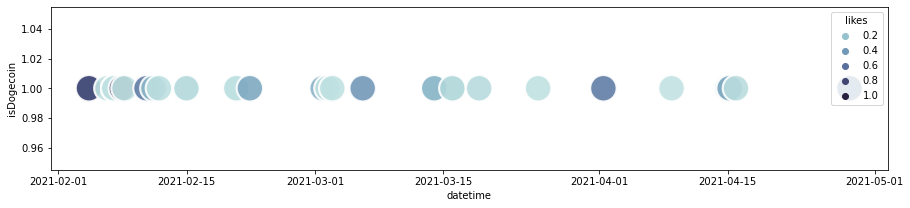

In [34]:
plt.figure(figsize=(15, 3))
sns.scatterplot(data=df, x=df.datetime, y=df.isDogecoin[df.isDogecoin == 1], hue=df.likes, 
                palette=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), s=700, alpha=0.9);

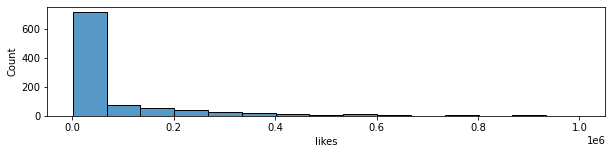

In [35]:
plt.figure(figsize=(10, 2))
sns.histplot(df.likes, bins=15);

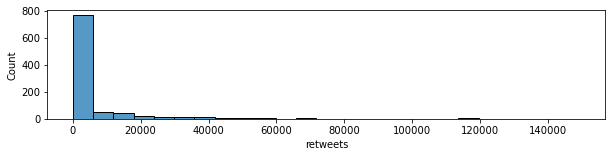

In [36]:
plt.figure(figsize=(10, 2))
sns.histplot(df.retweets, bins=25);

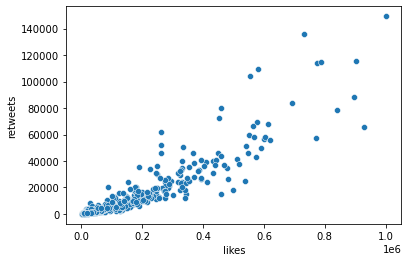

In [37]:
sns.scatterplot(x=df.likes, y=df.retweets);

There we can see a linera correlation between tweets and likes

In [38]:
mean_likes = df[df.likes != 0].groupby(by=[df.datetime.dt.year, df.datetime.dt.month]).agg({'likes': 'mean'})

In [39]:
mean_likes['date'] = [datetime.date(date[0], date[1], 1) for date in mean_likes.index]

In [40]:
mean_likes = mean_likes.set_index(mean_likes['date']).drop('date', axis=1)

<AxesSubplot:xlabel='date', ylabel='likes'>

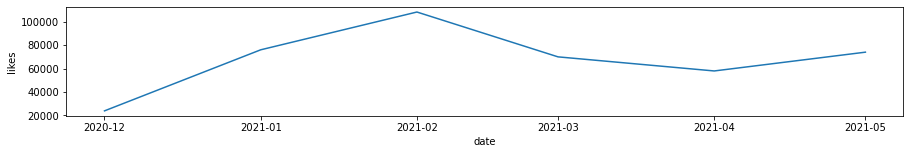

In [41]:
plt.figure(figsize=(15, 2))

sns.lineplot(y=mean_likes.likes, x=mean_likes.index)

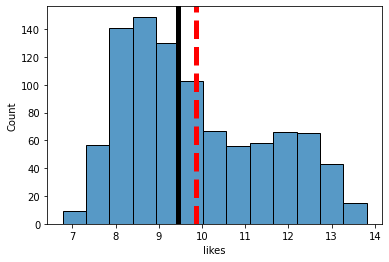

In [46]:
likes_log = np.log(df.likes)

likes_mean = likes_log.mean()
likes_median = likes_log.median()

sns.histplot(likes_log);
plt.axvline(likes_mean, color='red', linestyle='--', linewidth=5);
plt.axvline(likes_median, color='black', linestyle='-', linewidth=5);

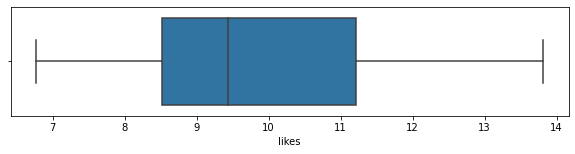

In [43]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=np.log(df.likes));

# A/B testing 

I am going to have two subsets A and B. 

- **A** subset will include standard deviation of price of dogecoin, when dogecoin was mentioned, with price of one day before and after this event. 
- **B** subset will contain standard deviation of price of samples that were taken from the remain data.  

Considering that price can grow through time, I am going to compare standard deviations of samples.

In [49]:
df[df.isDogecoin == 1].shape

(34, 5)

In [50]:
df.shape

(959, 5)

In [51]:
df.head()

,tweet_content,datetime,likes,retweets,isDogecoin
0,all tesla cars delivered in the final three da...,2020-12-29 22:16:14,73052,3507,0
1,"destiny, destinyno escaping that for me",2020-12-30 05:33:19,155133,11438,0
2,@tobyliiiiiiiiii are we sure this is real?,2020-12-30 07:57:09,5680,179,0
3,@harsimranbansal literally,2020-12-30 09:16:50,3033,56,0
4,@tesmanian_com this is very sensible. oppositi...,2020-12-30 09:24:36,4322,165,0


In [63]:
dogecoin_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,datetime
0,2016-05-07,0.000224,0.000225,0.000221,0.000223,0.000223,83754.0,2016-05-07
1,2016-05-08,0.000222,0.000223,0.000220,0.000222,0.000222,46961.0,2016-05-08
2,2016-05-09,0.000222,0.000225,0.000220,0.000224,0.000224,75340.0,2016-05-09
3,2016-05-10,0.000222,0.000224,0.000220,0.000220,0.000220,76419.0,2016-05-10
4,2016-05-11,0.000220,0.000224,0.000220,0.000224,0.000224,71369.0,2016-05-11


In [208]:
def get_previous_and_following_day(date):
    one_day_timestamp = 86400
    
    current_date_timestamp = datetime.timestamp(date)
    previous_date_timestamp = current_date_timestamp - one_day_timestamp
    following_date_timestamp = current_date_timestamp + one_day_timestamp
    
    previous_date = datetime.fromtimestamp(previous_date_timestamp)
    following_date = datetime.fromtimestamp(following_date_timestamp)
    
    previous_date = datetime(previous_date.year, previous_date.month, previous_date.day)
    following_date = datetime(following_date.year, following_date.month, following_date.day)
    
    return previous_date, following_date

In [209]:
get_previous_and_following_day(df.loc[0, ['datetime']].values[0])

(datetime.datetime(2020, 12, 28, 0, 0), datetime.datetime(2020, 12, 30, 0, 0))

In [210]:
dogecoin_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1.823000e+03
mean,0.009050,0.010098,0.008324,0.009395,0.009395,4.438836e+08
std,0.041315,0.047866,0.036952,0.043992,0.043992,2.952867e+09
min,0.000197,0.000205,0.000195,0.000197,0.000197,4.679900e+04
25%,0.001553,0.001676,0.001460,0.001567,0.001567,4.301310e+06
50%,0.002514,0.002577,0.002447,0.002516,0.002516,1.996860e+07
75%,0.003331,0.003467,0.003197,0.003325,0.003325,7.360159e+07
max,0.652842,0.695262,0.545102,0.657633,0.657633,6.941068e+10


In [211]:
dogecoin_data.datetime.max()

Timestamp('2021-05-07 00:00:00')

In [212]:
dogecoin_data.datetime.min()

Timestamp('2016-05-07 00:00:00')

In [213]:
dogecoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1827 non-null   object        
 1   Open       1823 non-null   float64       
 2   High       1823 non-null   float64       
 3   Low        1823 non-null   float64       
 4   Close      1823 non-null   float64       
 5   Adj Close  1823 non-null   float64       
 6   Volume     1823 non-null   float64       
 7   datetime   1827 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 114.3+ KB


In [227]:
def get_A_subset(tweets_data, price_data):
    
    dates_dogecoins_mentioned = tweets_data.loc[tweets_data.isDogecoin == 1, ['datetime']] 
    
    for date in dates_dogecoins_mentioned.datetime:
        current_date = datetime(date.year, date.month, date.day)
        
        previous_day, following_day = get_previous_and_following_day(date) 
        print(previous_day, date, following_day)
                
        previous_day_price = price_data.loc[price_data.datetime == previous_day, 'High'].values
        following_day_price = price_data.loc[price_data.datetime == following_day, 'High'].values
        
        current_date_price = price_data.loc[price_data.datetime == current_date, 'High'].values
        
        print(previous_day_price, current_date_price, following_day_price)
        print(20*'--', ;)

In [228]:
get_A_subset(df, dogecoin_data)

2021-02-03 00:00:00 2021-02-04 07:35:35 2021-02-05 00:00:00
[0.039105] [0.057869] [0.05374]
----------------------------------------
2021-02-03 00:00:00 2021-02-04 08:15:26 2021-02-05 00:00:00
[0.039105] [0.057869] [0.05374]
----------------------------------------
2021-02-03 00:00:00 2021-02-04 08:27:10 2021-02-05 00:00:00
[0.039105] [0.057869] [0.05374]
----------------------------------------
2021-02-05 00:00:00 2021-02-06 08:42:25 2021-02-07 00:00:00
[0.05374] [0.058308] [0.084357]
----------------------------------------
2021-02-06 00:00:00 2021-02-07 02:24:19 2021-02-08 00:00:00
[0.058308] [0.084357] [0.084945]
----------------------------------------
2021-02-06 00:00:00 2021-02-07 02:36:32 2021-02-08 00:00:00
[0.058308] [0.084357] [0.084945]
----------------------------------------
2021-02-06 00:00:00 2021-02-07 22:25:14 2021-02-08 00:00:00
[0.058308] [0.084357] [0.084945]
----------------------------------------
2021-02-07 00:00:00 2021-02-08 05:27:36 2021-02-09 00:00:00
[0.084

In [196]:
dogecoin_data.loc[dogecoin_data.datetime == datetime(2020, 5, 10), 'High']

1464    0.002613
Name: High, dtype: float64

In [199]:
type(datetime(2020, 4, 10))

datetime.datetime